In [1]:
# %%
import pandas as pd
from datetime import datetime

import numpy as np

from pathlib import Path
import matplotlib.pylab as pl

from nna import visutils 

In [21]:

# %%
# CONFIGS
class pathMap():

    def __init__(self) -> None:
        scratch = '/scratch/enis/data/nna/'
        home = '/home/enis/projects/nna/'
        self.data_folder = home + 'data/'

        self.exp_dir = '/home/enis/projects/nna/src/nna/exp/megan/run-3/'

        self.clipping_results_path = Path(scratch +
                                          'clipping_info/all-merged_2021-02-10/')

        self.output_dir = scratch + 'real/'

        self.file_properties_df_path = self.data_folder + '/allFields_dataV4.pkl'

        self.results_folder = home + 'results/'
        self.vis_output_path = self.results_folder + 'vis/bars_test_V2/'


def setup_configs():
    pathmap = pathMap()

    config = {}
    versiontag = 'multi9-V1'
    id2name={'1-0-0': 'biophony',
     '1-1-0': 'bird',
     '1-1-10': 'songbirds',
     '1-1-7': 'duck-goose-swan',
     '0-0-0': 'anthrophony',
     '1-3-0': 'insect',
     '1-1-8': 'grouse-ptarmigan',
     '0-2-0': 'aircraft',
     '3-0-0': 'silence'}
    
    
    generic_id2name = list(id2name.items())
    id2name = {}
    for k, v in generic_id2name:
        id2name[f'{versiontag}-{k}'] = v

    config['id2name'] = id2name
    config['input_data_freq'] = '10S'
    # FREQS to reduce results
    config['output_data_freq'] = '270min'

    classname2colorindex = {

        'anthrophony':14,
        'auto':15,
        'aircraft':9,

        'wind':18,
        'running water':0,
        'silence':1,

        'bird':4,
        'songbirds':5,
        'duck-goose-swan':16,
        'grouse-ptarmigan':17,

        'biophony':8,
        'insect':10,
        'mammal':2,

    }

    config['classname2colorindex'] = classname2colorindex
    config['prob2binary_flag'] = True
    # cmap to use
    aCmap = pl.cm.tab20
    norm_cmaps = visutils.add_normal_dist_alpha(aCmap)
    # cached results
    src='/home/enis/projects/nna/src/scripts/'
    csv_file=src+'prudhoe/23/aggregated/multi9-V1_prob2binary=True_output-data-freq=270min_prob.csv'

    cached_preds = {('prudhoe','23'):csv_file}
    config['cached_preds'] = cached_preds
    config['norm_cmaps'] = norm_cmaps
    
    return pathmap, config



def setup(args, pathmap, region_location):

    file_properties_df = pd.read_pickle(pathmap.file_properties_df_path)

    #important to keep them in order
    file_properties_df.sort_values(by=['timestamp'], inplace=True)

    # delete older than 2016

    # delete older than 2016
    fromtime = datetime(2016, 1, 1, 0)
    file_properties_df = file_properties_df[
        file_properties_df.timestamp >= fromtime]
    
#     fromtime = datetime(2019, 5, 1, 0)
#     file_properties_df = file_properties_df[
#         file_properties_df.timestamp >= fromtime]
    
#     fromtime = datetime(2019, 5, 30, 0)
#     file_properties_df = file_properties_df[
#         file_properties_df.timestamp <= fromtime]

    if not region_location:
        # region_location = [('anwr','49'),('prudhoe','11'),('prudhoe','26')]
        region_location = tuple(
            sorted(
                set(
                    zip(file_properties_df.region.values,
                        file_properties_df.locationId.values))))

    return region_location,file_properties_df
# %%
def sigmoid(data):
    return 1 / (1 + np.exp(-data))



In [22]:

def vis_preds_with_clipping_local(region_location, config, file_properties_df,
                            pathmap,norm_cmaps,cached_preds):


    no_result = {}

    for region, location_id in region_location:
        # print(region, all_regions.index(region),'location_id',location_id)
        filtered_files = file_properties_df[file_properties_df.region == region]
        filtered_files = filtered_files[filtered_files.locationId ==
                                        location_id]
        filtered_files = filtered_files[filtered_files.durationSec > 0]

        figures_axes, no_result_paths = visutils.vis_preds_with_clipping(
            region,
            location_id,
            filtered_files,
            config['input_data_freq'],
            config['output_data_freq'],
            config['id2name'].keys(),
            norm_cmaps,
            pathmap.output_dir,
            pathmap.clipping_results_path,
            pathmap.vis_output_path,
            config['id2name'],
            clipping_threshold=1.0,
            prob2binary_flag=config['prob2binary_flag'],
            pre_process_func=sigmoid,
            classname2colorindex=config.get('classname2colorindex',None),
            cached_pred=cached_preds[(region,location_id)])


        return figures_axes, no_result_paths



now
2019 [Timestamp('2019-05-01 00:00:00'), Timestamp('2019-06-01 00:00:00'), Timestamp('2019-07-01 00:00:00'), Timestamp('2019-08-01 00:00:00'), Timestamp('2019-09-01 00:00:00')]


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


figured saved to /home/enis/projects/nna/results/vis/bars_test_V2/Freq-270min/prudhoe/23_2019.png


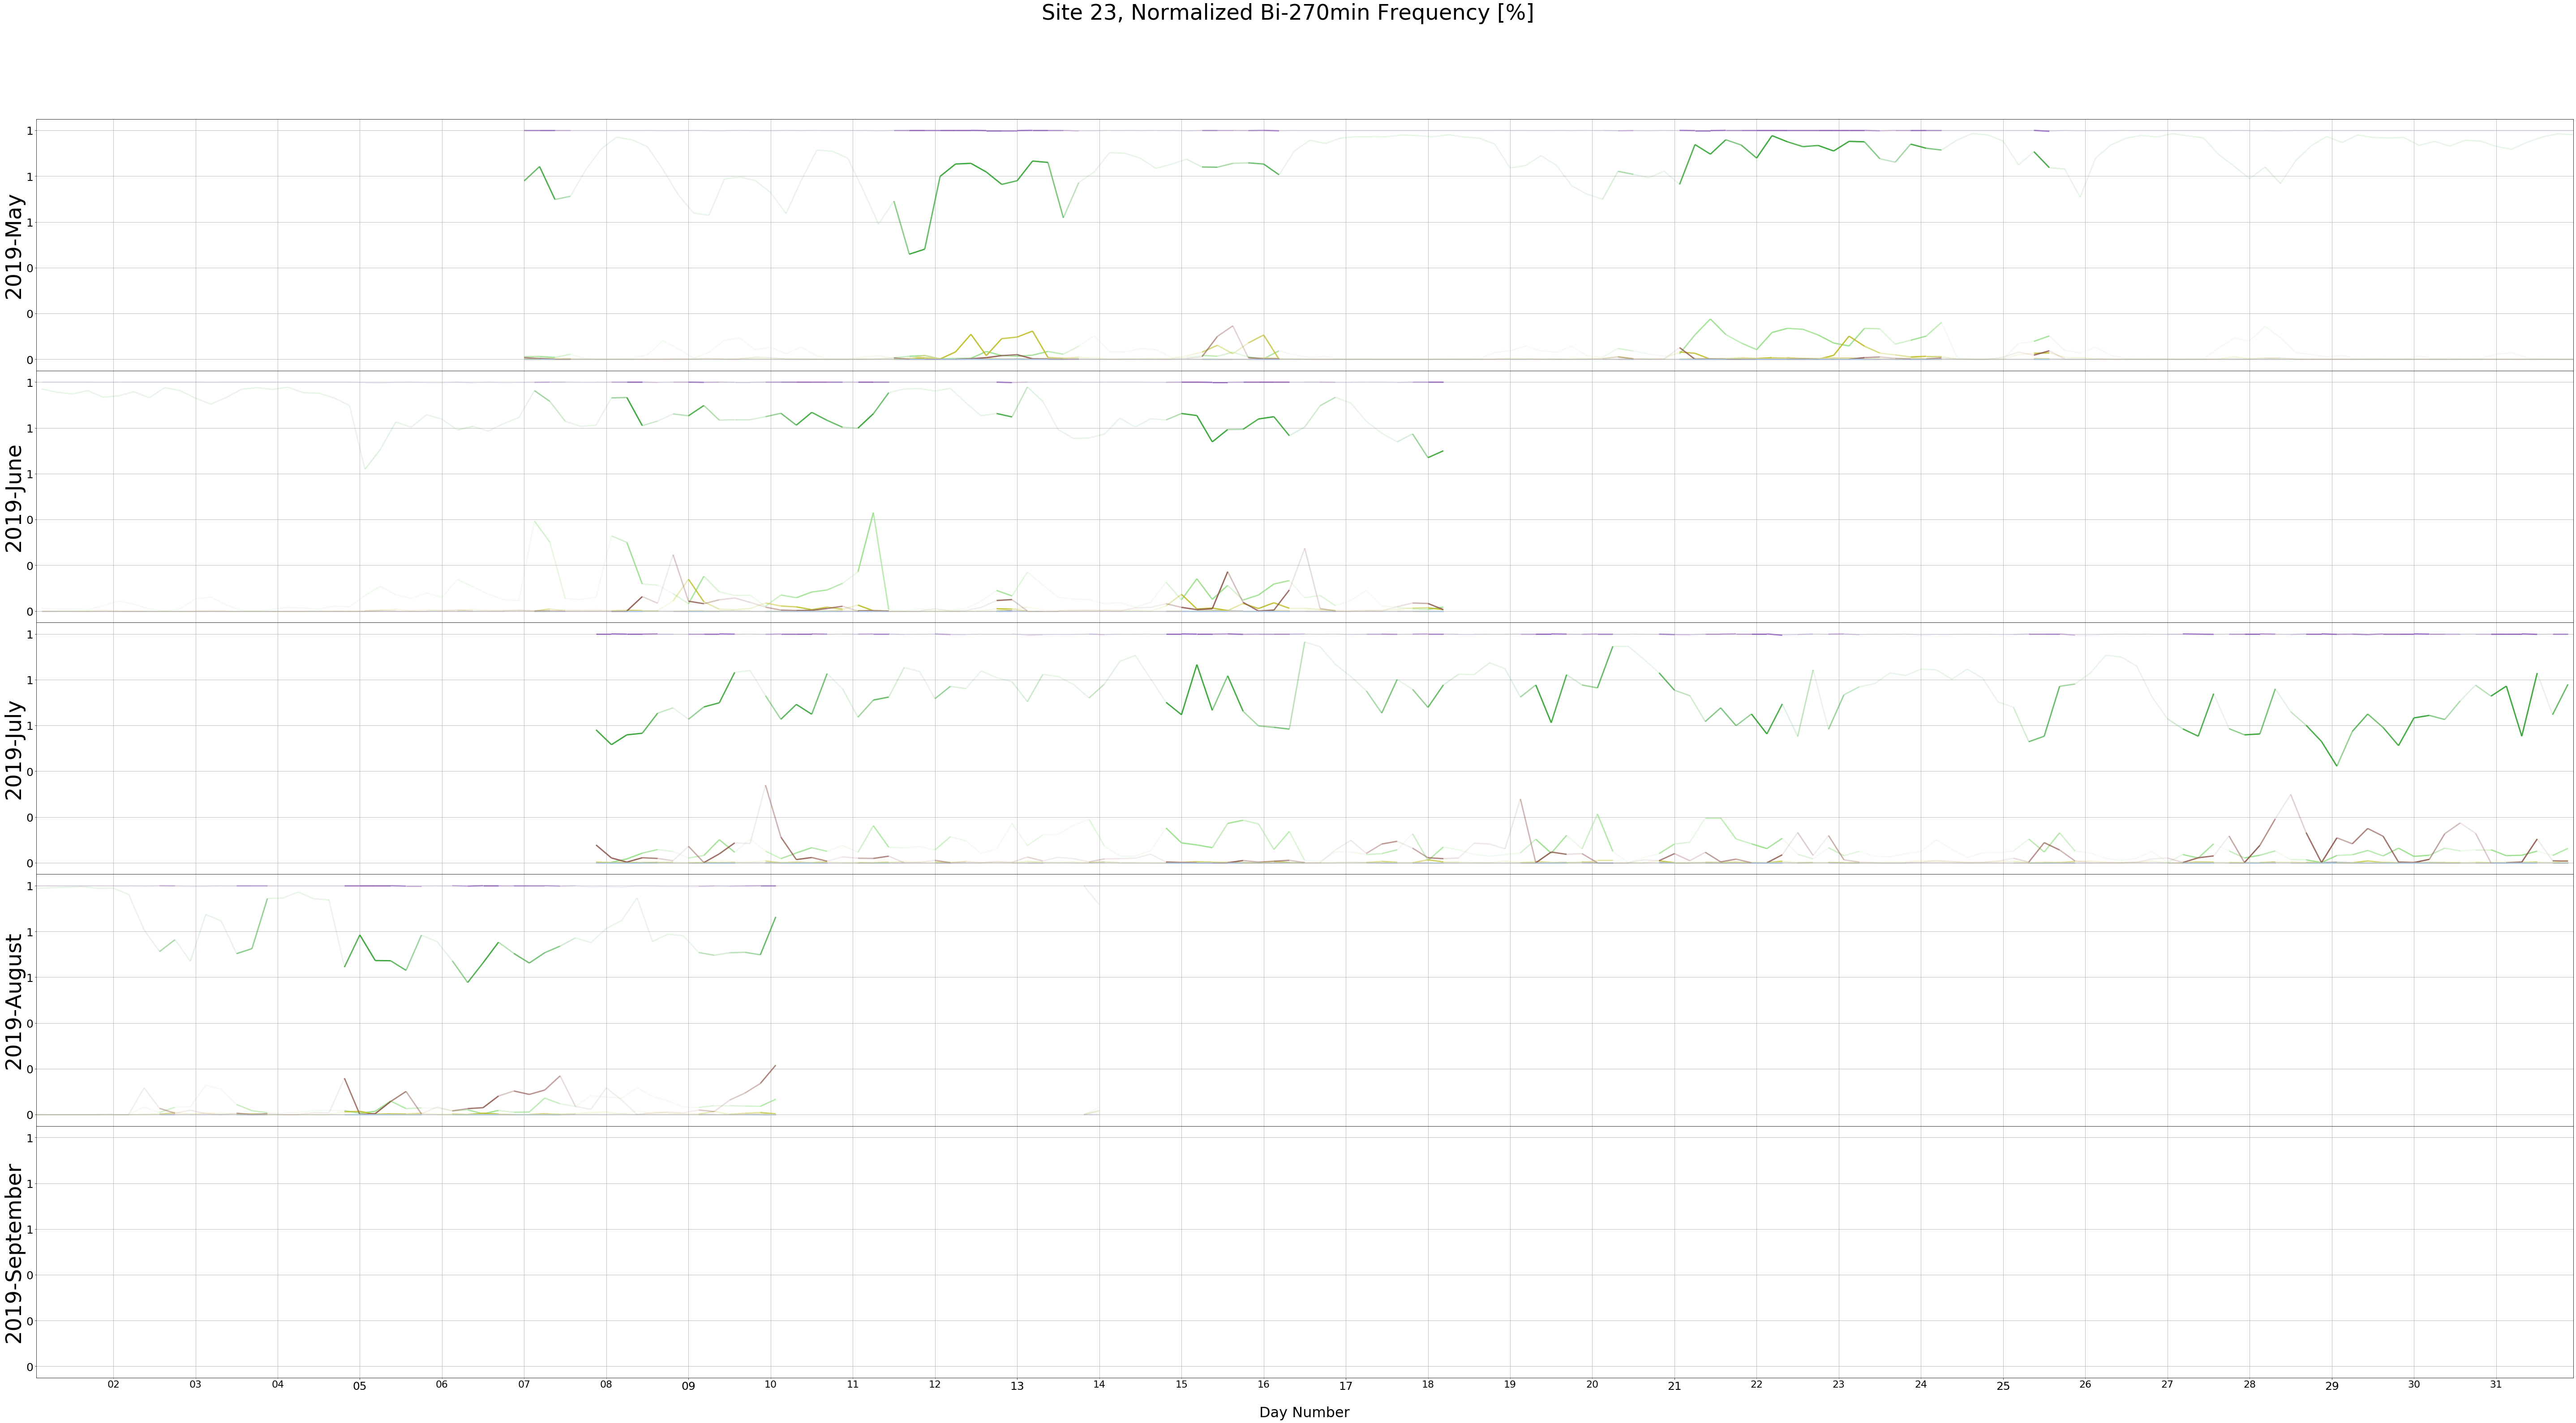

In [23]:

pathmap, config = setup_configs()
location ='23'
region='prudhoe'
config['output_data_freq']='270min'

if region!='' and location !='':
    region_location = [(region,location)]
else:
    print('Region and location are not given, we will do all of them.')
    region_location = None

region_location,file_properties_df = setup('', pathmap,region_location)
print('now')

cached_preds=config['cached_preds']
norm_cmaps=config['norm_cmaps'] 
figures_axes, no_result_paths = vis_preds_with_clipping_local(region_location, config, file_properties_df, pathmap,norm_cmaps,cached_preds)


In [13]:
print('a')

a


In [10]:
fig,ax=figures_axes[0]


csv_path = 'dalton03labels.csv'

(letters,y_multi_labels_by_month,
 x_multi_label_by_month, 
 classname2colorindex,color_indexes)=visutils.load_enis_labels4bars(csv_path,config.get('classname2colorindex',None))

norm_cmaps=visutils.add_equally_spaced_bars(letters,y_multi_labels_by_month,
                        x_multi_label_by_month,ax,color_indexes,norm_cmaps)

visutils.add_legend(ax,classname2colorindex,norm_cmaps,legend_ax_index=0,)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

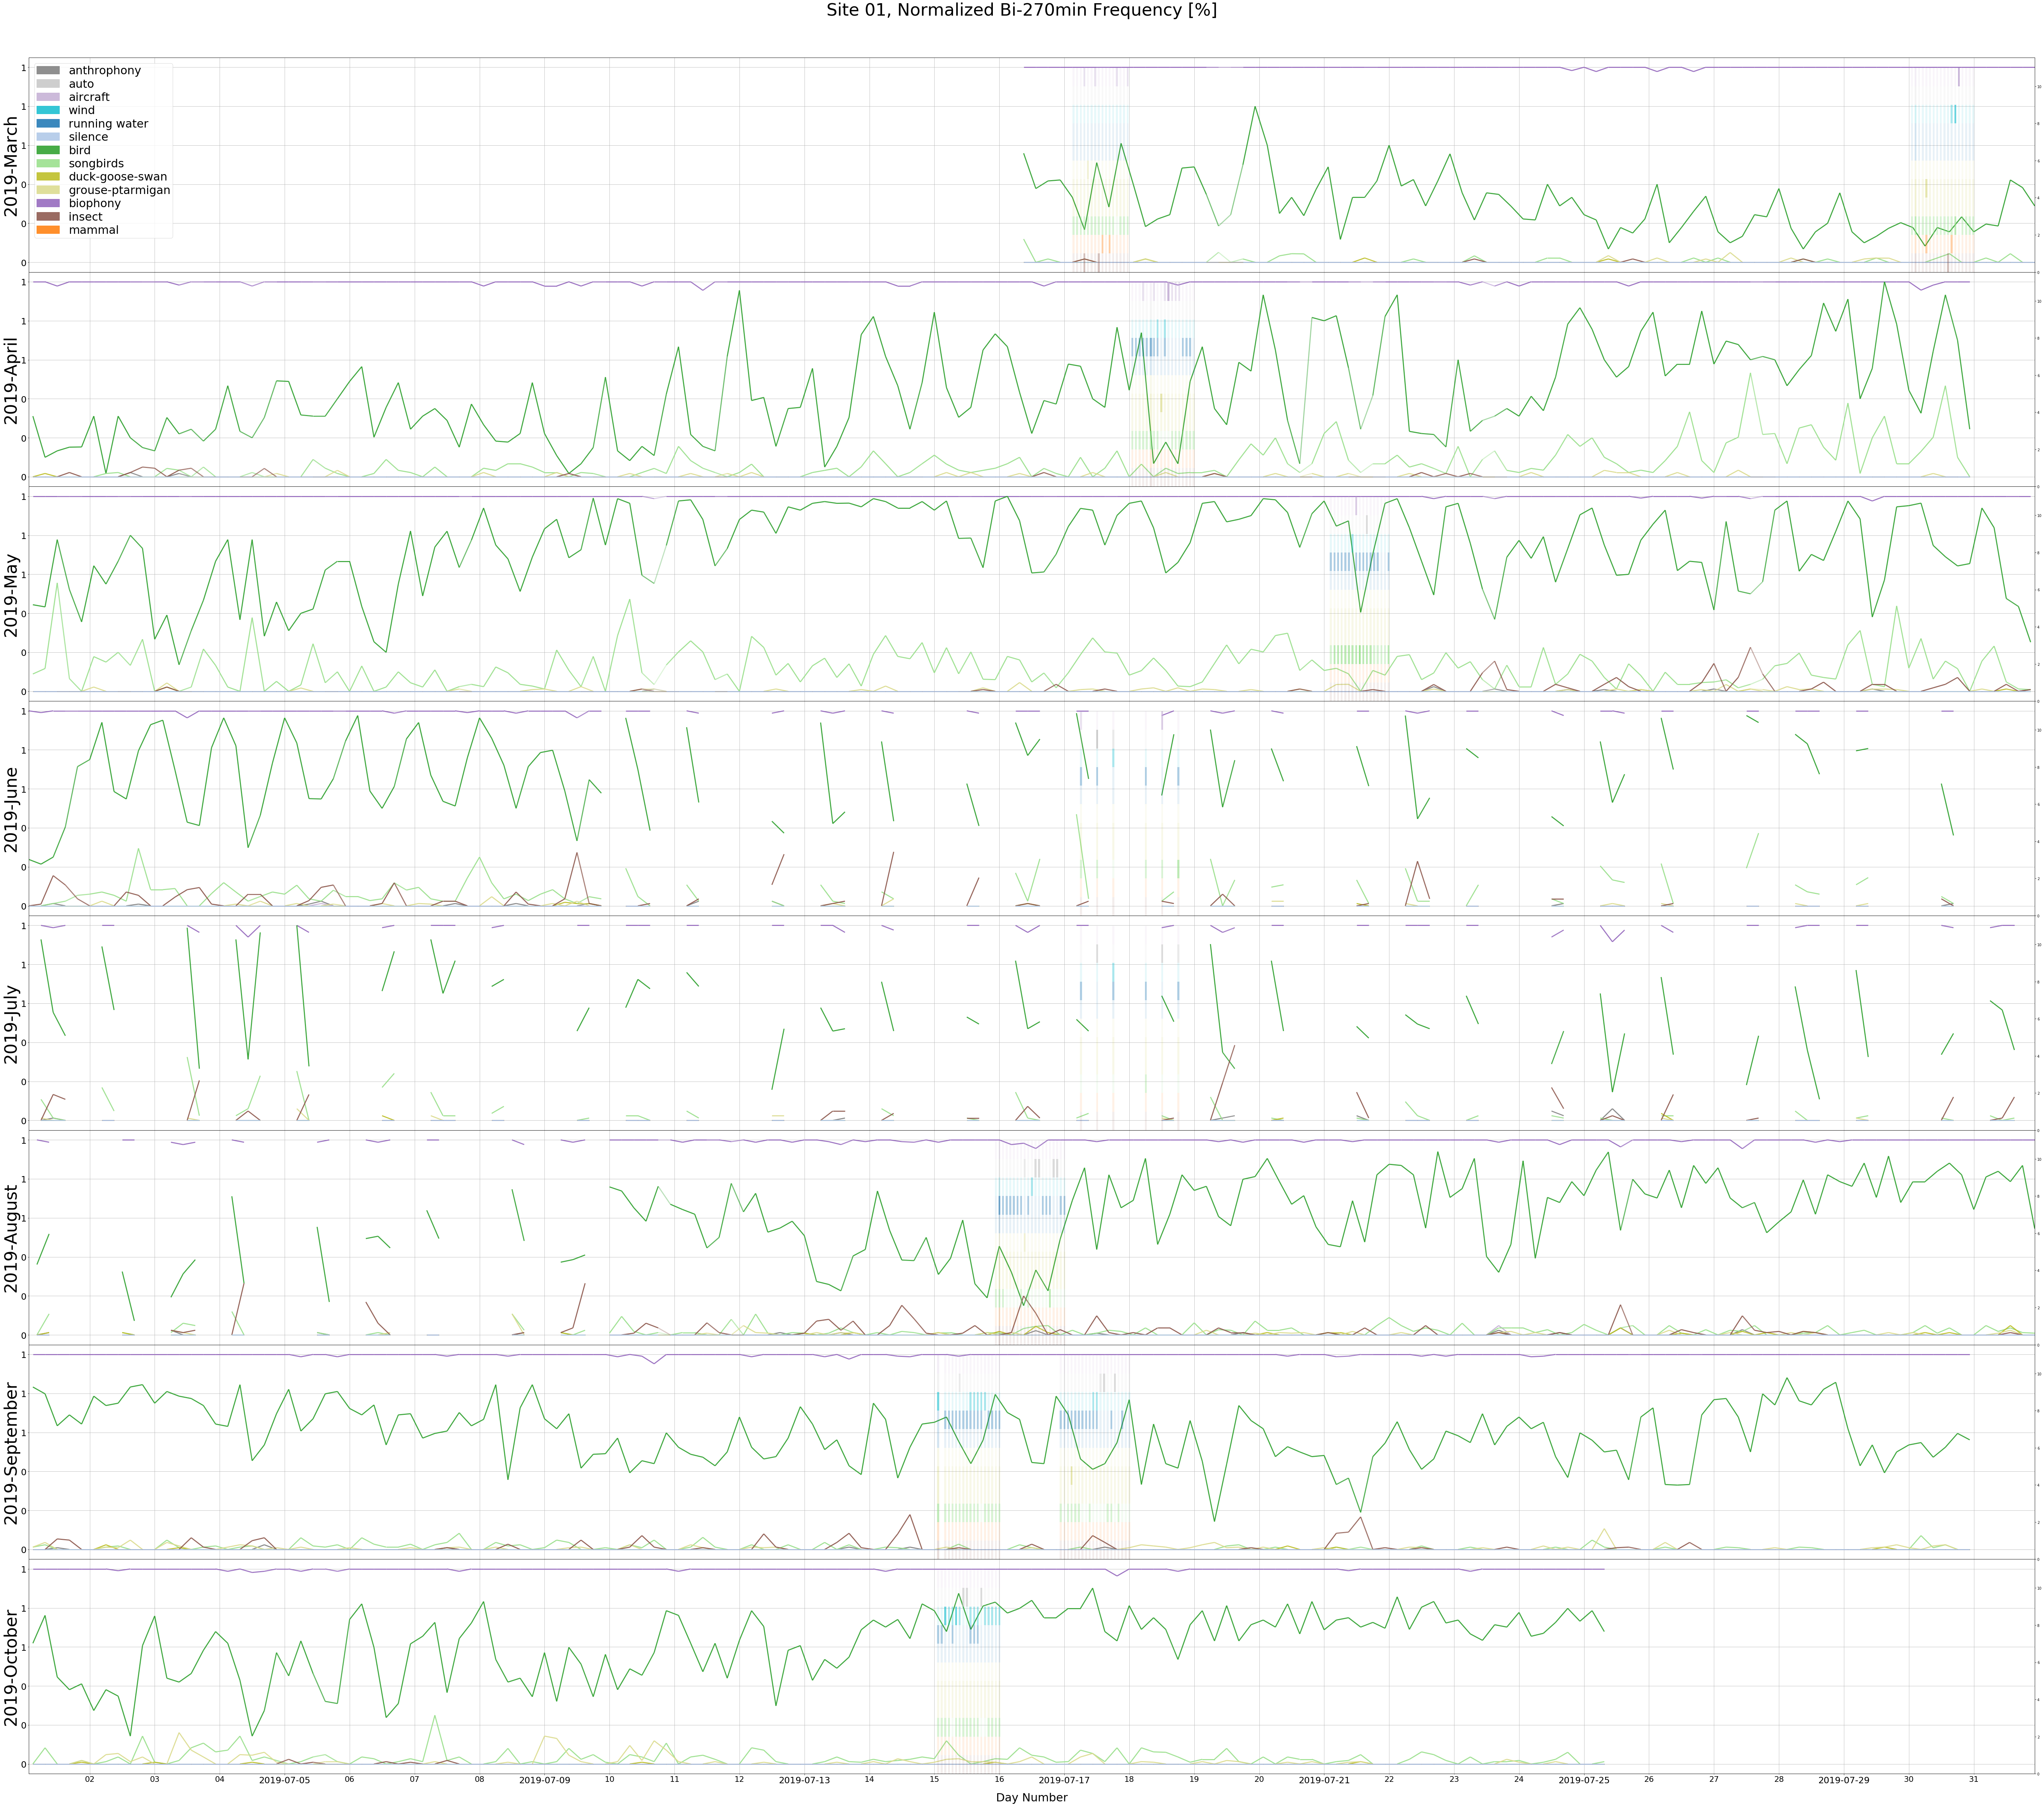

In [11]:
fig


In [12]:
fig.savefig('dalton_01_wbars.png')

KeyboardInterrupt: 